In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers

model = tf.keras.models.load_model("final_model_without_aug/day_night_final/")

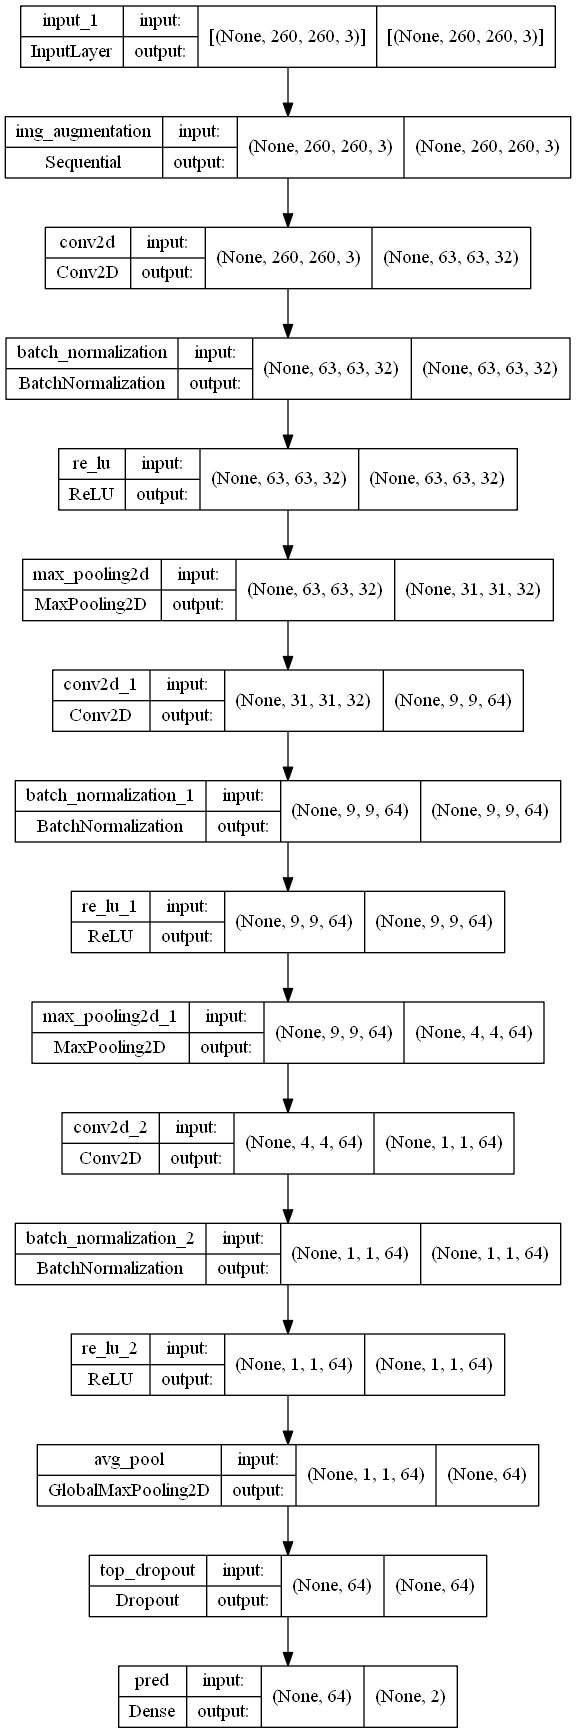

In [2]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [3]:
inputs = tf.keras.Input([260,260,3])

x = layers.Conv2D(32,9,strides=4,name = 'Conv_1') (inputs)
x = layers.BatchNormalization(name = 'BatchNorm_1')(x)
x = layers.ReLU(name = 'ReLu_1') (x)
x = layers.MaxPool2D(2,name = 'MaxPool_1') (x)
x = layers.Conv2D(64,7,strides=3,name = 'Conv_2') (x)
x = layers.BatchNormalization(name = 'BatchNorm_2')(x)
x = layers.ReLU(name = 'ReLu_2') (x)
x = layers.MaxPool2D(2,name = 'MaxPool_2') (x)
x = layers.Conv2D(64,3,strides=2,name = 'Conv_3')(x)
x = layers.BatchNormalization(name = 'BatchNorm_3')(x)
x = layers.ReLU(name = 'ReLu_3') (x)
x = layers.GlobalMaxPooling2D(name="GlobaMaxPool")(x)
x = layers.Dropout(0.15, name="Dropout")(x)
outputs = layers.Dense(2, activation="softmax", name="Predictions",kernel_regularizer=tf.keras.regularizers.L2())(x)[:,1]
new = tf.keras.Model(inputs, outputs, name="Night_Day")
new.compile('Adam',loss= tf.keras.losses.BinaryCrossentropy())

In [4]:
for l1,l2 in zip(model.layers[2:],new.layers[1:-1]):
    new.get_layer(l2.name).set_weights(model.get_layer(l1.name).get_weights())

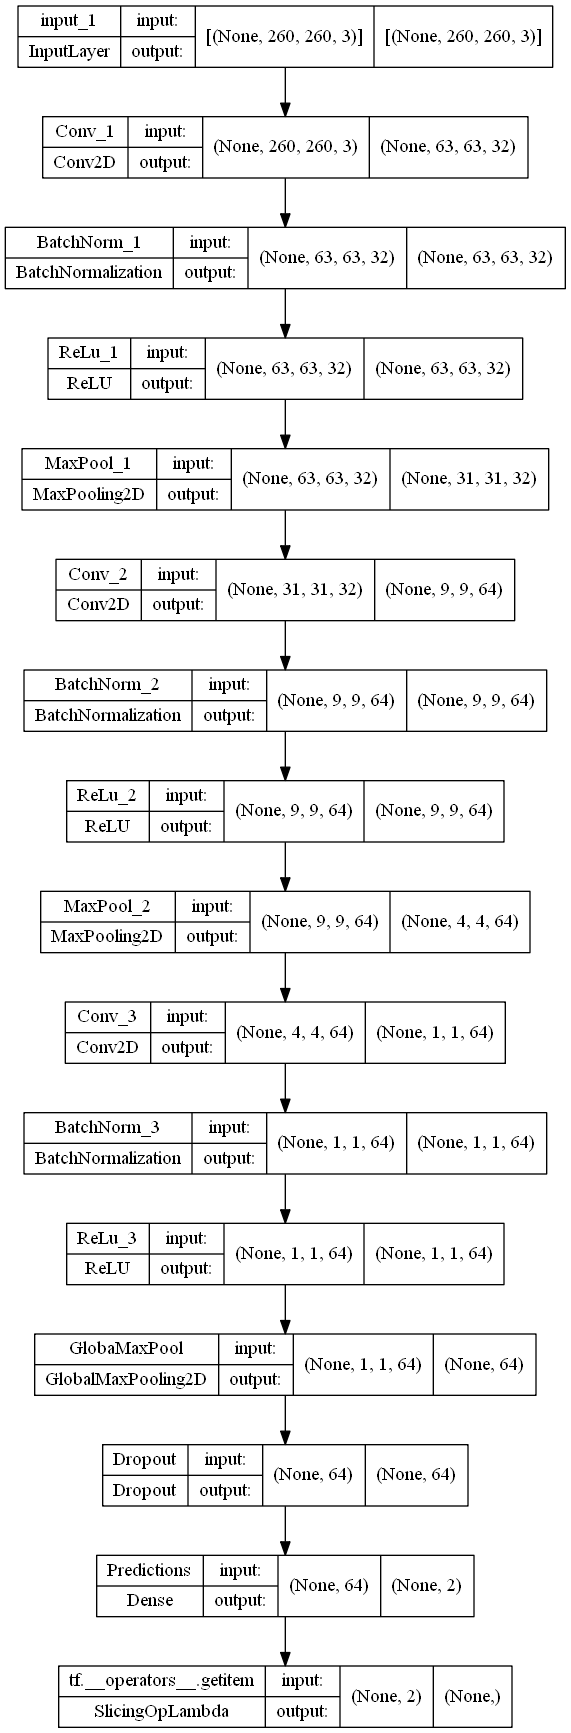

In [5]:
tf.keras.utils.plot_model(new,show_shapes=True)

In [6]:
new.save('Deploy_Model')

INFO:tensorflow:Assets written to: Deploy_Model\assets


In [7]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
model = tf.keras.models.load_model("Deploy_Model")

In [8]:
model.output

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.getitem')>

In [9]:
import get_ds_test
test_ds = get_ds_test.get_ds()
df = pd.read_csv("Relabeled_Test_DS/cleaned_data.csv",index_col=0)
labels = df["Label"].apply(lambda x : int(x == "Night")).values
model.evaluate(test_ds.batch(64))

c:\Users\ual\.conda\envs\felix\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


39/39 [==============================] - 3s 14ms/step - loss: 0.0991


0.0991000384092331

In [10]:
import tensorflow_datasets as tfds

In [11]:
for i in tfds.as_numpy(test_ds):
    print(i[0].shape)
    break

(260, 260, 3)


In [13]:
preds = model.predict(test_ds.batch(256))
(labels == (preds > 0.5)).mean()

0.9761904761904762